####  목표 : 0~9까지의 손글씨 이미지 데이터를 분류하는 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 데이터를 임포트
from tensorflow.keras.datasets import mnist

In [3]:
data = mnist.load_data()

In [4]:
len(data)

2

In [5]:
# 데이터가 3차원 배열로 크게는 train, test로 나뉘어져 있고
# 각 train,test 안에 문제와 정답 데이터로 한번 더 나뉘어져 있음
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
data[0][0].shape,data[0][1].shape,data[1][0].shape,data[1][1].shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
# 이미지라는 2차원 데이터를 다루기 때문에 shape의 형태가 3칸이 나오게 됨
# (데이터의 수, 가로픽셀 수, 세로픽셀 수)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

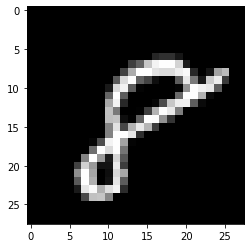

In [11]:
plt.imshow(X_train[59999], cmap='gray')
# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap = 'gray' : 이미지를 흑백으로 전환시켜주는 명령

- 정답 데이터를 인코딩 하는 이유
    - 1. 레이블 값이 3개 이상일 경우 기계가 이해하기 위해 0또는 1로 변경하여 입력
    - 2. 신경망 출력층에서 각 레이블 값들에 대한 확률 정보를 확인하여 최종 예측에 반영하기 위해서
    - pd.get_dummies : 원핫인코딩
    - to_categorical:keras에서 지원해주는 인코딩 명령(=원핫인코딩)

In [12]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [13]:
y_test_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,1,0,0,0,0


In [14]:
# CNN은 다차원 데이터에 대한 표시가 필요함(흑백 : 1, 컬러(RGB) : 3)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
# X_train.shape[0] : 60000

In [16]:
# 0~255 사이의 픽셀 값을 0~1사이로 줄여줄 수 있음
# 분산을 감소 시킬 수 있음, 연산속도를 향상시킬 수 있음
# 데이터의 픽셀 수치값을 실수로 변경 시킨 후에 255로 나눠줌

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [17]:
X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## CNN 신경망 구성하기!

In [19]:
from tensorflow.keras import Sequential
# Conv1D : 1차원 신호 데이터, Conv2D : 2차원 이미지 데이터, Conv3D : 3차원 영상데이터
from tensorflow.keras.layers import Dense, Conv2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [20]:
X_train[0].shape

(28, 28, 1)

In [21]:
# Cnn 신경망 설계
model = Sequential()

# 1. 특성 추출부(Conv - 특징이 되는 정보를 추출)
# Conv2D : 2D 이미지 데이터에 대해 특징적인 부분을 도드라지게 만들어줌
# MaxPooling2D : 2D 이미지 데이터에 대해 필요없는 부분을 삭제(이미지 크기 축소)


model.add(Conv2D(input_shape=(X_train[0].shape),
                 filters = 10, # 필터(돋보기)의 개수 -> 추출하는 특징의 개수를 설정
                 # 필터의 크기 설정
                 kernel_size = (3,3),
                 # 원본 데이터의 크기에 맞게 알아서 패팅을 적용(valid : 적용 x)
                 padding = 'same',
                 # 필터로 합성곱 연산시 건너뛰는 크기를 지정(행, 열) 지정
                 strides = (1,1),
                 activation='relu'         
                ))

# 2. 특성 추출부(Pooling - 불필요한 정보 삭제)
# pool_size : 디폴트 값은 2 -> 2x2 필터에 stride도 2씩 적용
model.add(MaxPooling2D(pool_size=2,
         strides = 2
         
         ))

# 2~3개의 Conv, MaxPooling 층을 직접 쌓아보자~!
model.add(Conv2D(filters = 30, # 필터(돋보기)의 개수 -> 추출하는 특징의 개수를 설정
                # 필터의 크기 설정
                 kernel_size = (4,4),
                 # 원본 데이터의 크기에 맞게 알아서 패팅을 적용(valid : 적용 x)
                 padding = 'same',
                 # 필터로 합성곱 연산시 건너뛰는 크기를 지정(행, 열) 지정
                 strides = (1,1), # 픽셀이 큰 경우 stride를 늘리면  좋을 수 있음
                 activation='relu'         
                ))

model.add(MaxPooling2D(pool_size=2))

# 3. MLP층에 넣어주기!
model.add(Flatten())  #input_shape는 사용하지 않아도 됨
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1238, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 30)        4830      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1470)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               753152    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [22]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.0005),
             metrics=['acc']
             )

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### 최적화 모델 찾기
    - 모델체크포인트 : 모델을 저장
    - 얼리스탑핑 : 조기 학습 중단(과대적합, 시간낭비를 방지)

In [24]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태를 설정
save_path = './hand_model/HandModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# epoch는 keras에서 지정해 놓은 키워드
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(001, 002, 003 ~) 
# f : 소수점 형태, .4 -> 소수점 4자리 까지 형태의 자리수(0.001,0.002 ~)
# hdf5 : 저장되는 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로 설정
                         monitor = 'val_acc',   # 해당 값을 기준으로 파일을 저장
                         save_best_only = True,# monitor 값이 가장 최고점을 갱신 했을 때 모델을 저장
                         verbose = 1 #모델 개선 및 저장 메시지를 표시
                        )

In [25]:
# 2. 조기 학습 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        # monitor의 값 개선을 몇번이나 기다려줄 것인지 설정
                        patience = 5
                       )

# => 모델 학습시 val_acc가 5번의 epochs를 돌 동안 개선이 되지 않으면 중단시켜주세요!


In [26]:
# Cnn 신경망 설계
model = Sequential()

# 1. 특성 추출부(Conv - 특징이 되는 정보를 추출)
# Conv2D : 2D 이미지 데이터에 대해 특징적인 부분을 도드라지게 만들어줌
# MaxPooling2D : 2D 이미지 데이터에 대해 필요없는 부분을 삭제(이미지 크기 축소)


model.add(Conv2D(input_shape=(X_train[0].shape),
                filters = 10, # 필터(돋보기)의 개수 -> 추출하는 특징의 개수를 설정
                # 필터의 크기 설정
                 kernel_size = (3,3),
                 # 원본 데이터의 크기에 맞게 알아서 패팅을 적용(valid : 적용 x)
                 padding = 'same',
                 # 필터로 합성곱 연산시 건너뛰는 크기를 지정(행, 열) 지정
                 strides = (1,1),
                 activation='relu'         
                ))

# 2. 특성 추출부(Pooling - 불필요한 정보 삭제)
# pool_size : 디폴트 값은 2 -> 2x2 필터에 stride도 2씩 적용
model.add(MaxPooling2D(pool_size=2))

# 2~3개의 Conv, MaxPooling 층을 직접 쌓아보자~!
model.add(Conv2D(filters = 30, # 필터(돋보기)의 개수 -> 추출하는 특징의 개수를 설정
                # 필터의 크기 설정
                 kernel_size = (4,4),
                 # 원본 데이터의 크기에 맞게 알아서 패팅을 적용(valid : 적용 x)
                 padding = 'same',
                 # 필터로 합성곱 연산시 건너뛰는 크기를 지정(행, 열) 지정
                 strides = (1,1),
                 activation='relu'         
                ))

model.add(MaxPooling2D(pool_size=2))

# 3. MLP층에 넣어주기!
model.add(Flatten())  #input_shape는 사용하지 않아도 됨
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1238, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(lr=0.0005),
             metrics=['acc']
             )

h1 = model.fit(X_train,y_train_one_hot,
                  validation_split=0.3,
              epochs=50,  # epochs : 학습 횟수를 설정
              batch_size=32, callbacks=[f_mckp, f_early])

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
41728/42000 [============================>.] - ETA: 0s - loss: 1.1379 - acc: 0.5760
Epoch 00001: val_acc improved from -inf to 0.80656, saving model to ./hand_model/HandModel_001_0.8066.hdf5
42000/42000 [==============================] - 8s 196us/sample - loss: 1.1339 - acc: 0.5777 - val_loss: 0.5799 - val_acc: 0.8066
Epoch 2/50
41472/42000 [============================>.] - ETA: 0s - loss: 0.3517 - acc: 0.8893
Epoch 00002: val_acc improved from 0.80656 to 0.92700, saving model to ./hand_model/HandModel_002_0.9270.hdf5
42000/42000 [==============================] - 5s 114us/sample - loss: 0.3504 - acc: 0.8896 - val_loss: 0.2303 - val_acc: 0.9270
Epoch 3/50
41952/42000 [============================>.] - ETA: 0s - loss: 0.2020 - acc: 0.9359
Epoch 00003: val_acc improved from 0.92700 to 0.94556, saving model to ./hand_model/HandModel_003_0.9456.hdf5
42000/42000 [==============================] - 5s 113us/sample - loss: 0.2020 - 

### 저장된 모델 로딩하기

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_model = load_model("hand_model/HandModel_021_0.9893.hdf5")

In [ ]:
best_model.evaluate(X_test, y_test_one_hot)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
best_model.predict(X_test)